<a href="https://colab.research.google.com/github/CodeHunterOfficial/ABC_DataMining/blob/main/ML/%D0%A0%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D0%BE%D0%BD%D0%BD%D1%8B%D0%B9_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D0%91%D0%B0%D0%B7%D0%BE%D0%B2%D1%8B%D0%B9_%D1%83%D1%80%D0%BE%D0%B2%D0%B5%D0%BD%D1%8C_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Регрессионный анализ. Базовый уровень.

**Введение**  

Линейная регрессия (ЛР) — это метод машинного обучения с учителем, который используется для выявления линейной зависимости между одной зависимой переменной (целевой переменной) и набором независимых переменных (входных признаков). Она строит линейную функцию, которая наилучшим образом описывает наблюдаемые данные.  

Линейная регрессия является базовым инструментом в машинном обучении. Модель обучается на размеченных данных, сопоставляя их с подходящей линейной функцией. Это позволяет использовать модель для прогнозирования новых данных. Простота алгоритма делает его полезным как для анализа данных, так и для реализации. Благодаря своей прозрачности ЛР легко понять и внедрить, что делает её ценным инструментом для начинающих специалистов и основой для более сложных методов.  

Кроме того, линейная регрессия полезна для проверки предположений о данных, что позволяет исследователям тестировать гипотезы и проверять статистическую значимость связей.  

Математически модель линейной регрессии представляет собой линейное уравнение, включающее независимые переменные (признаки), их коэффициенты и смещение (константу):  
$$y = b + \sum_{i=1}^m w_i x_i$$  
где $m$ — количество признаков, $w_i$ — веса, $x_i$ — значения признаков, а $b$ — смещение.  

Цель обучения заключается в подборе коэффициентов ($w_i$) и смещения ($b$), чтобы минимизировать разницу между фактическими и предсказанными значениями. Эта разница, называемая остатком, отражает степень соответствия модели данным. Остаток вычисляется как разница между истинным значением целевой переменной и значением, предсказанным моделью.  

Таким образом, линейная регрессия является простым, но мощным инструментом анализа и прогнозирования, который используется как в научных исследованиях, так и в практических задачах.  



**Подготовка данных**  

Для того чтобы модель линейной регрессии давала точные и надежные результаты, данные должны соответствовать ряду условий. Несоблюдение этих требований может привести к ухудшению качества модели.  

1. **Линейность.**  
   Между независимыми и зависимой переменными должна существовать линейная связь. Это означает, что изменения зависимой переменной пропорционально приводят к изменениям независимых переменных.  

2. **Независимость наблюдений.**  
   Наблюдения в наборе данных должны быть статистически независимы. Значения признаков одного наблюдения не должны зависеть от значений признаков другого.  

3. **Однородность дисперсии остатков.**  
   Остатки (разница между фактическими и предсказанными значениями) должны иметь одинаковую дисперсию по всему диапазону предсказанных значений. Это свойство также называют гомоскедастичностью и оно указывает на то, что признаки не влияют на вариативность остатков.  

4. **Нормальность распределения остатков.**  
   Остатки должны быть распределены по нормальному закону (распределение Гаусса). Это предполагает симметричность и наличие одного центрального пика у распределения остатков.  

5. **Отсутствие мультиколлинеарности.**  
   Признаки не должны иметь высокой взаимной корреляции. Мультиколлинеарность — это ситуация, при которой две или более независимые переменные сильно связаны друг с другом. Это затрудняет оценку индивидуального вклада каждого признака в предсказание.  

**Выбор признаков.**  
Тщательная подборка признаков играет ключевую роль в построении качественной модели. Учет нерелевантных или избыточных признаков может привести к переобучению модели и затруднить её интерпретацию. Поэтому важно анализировать данные на предмет их соответствия вышеуказанным условиям перед началом обучения модели.


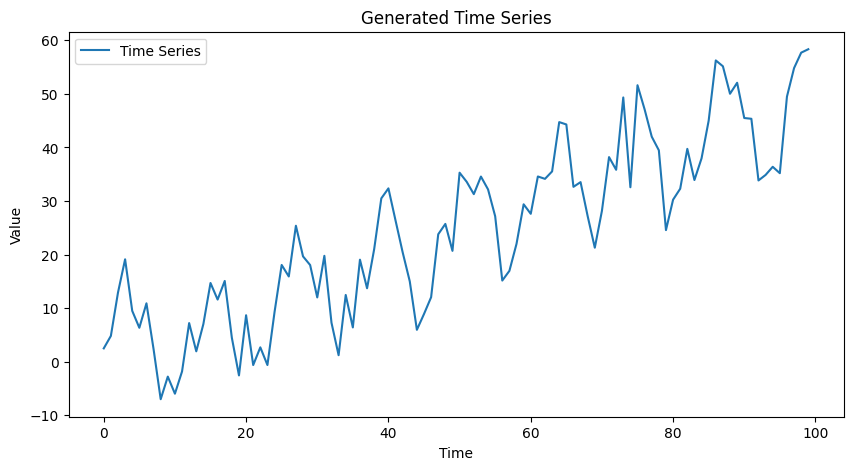

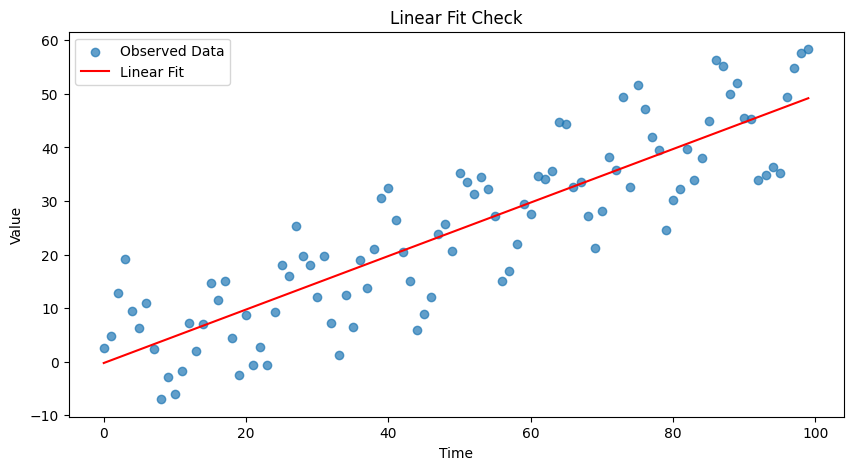

Mean Squared Error: 66.1897
❌ Нарушение линейности: модель плохо описывает данные.


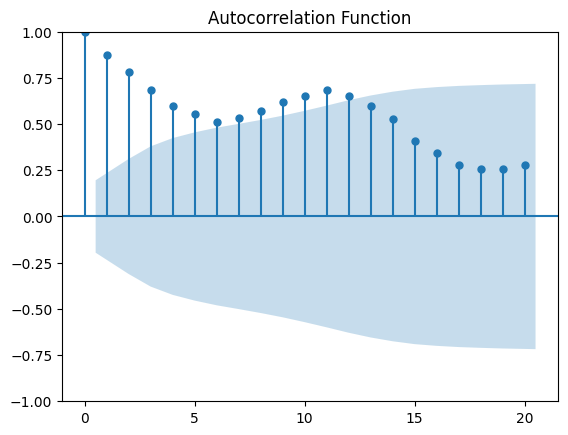

❌ Нарушение независимости: данные имеют автокорреляцию.


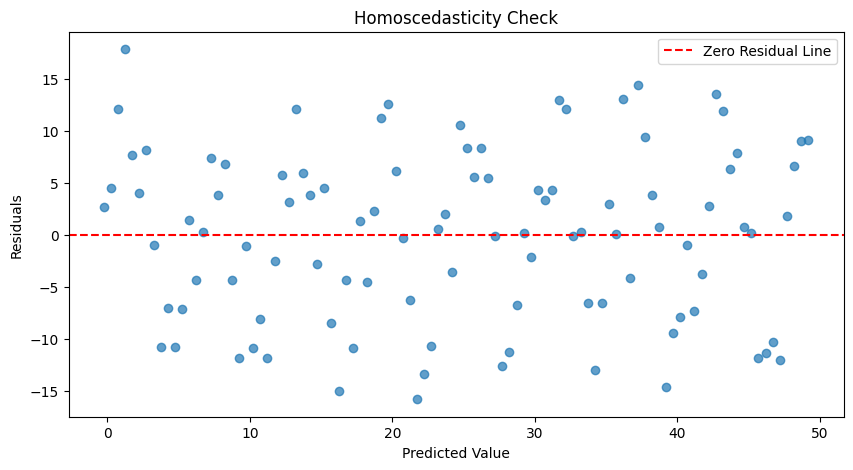

❌ Нарушение гомоскедастичности: дисперсия остатков неоднородна.


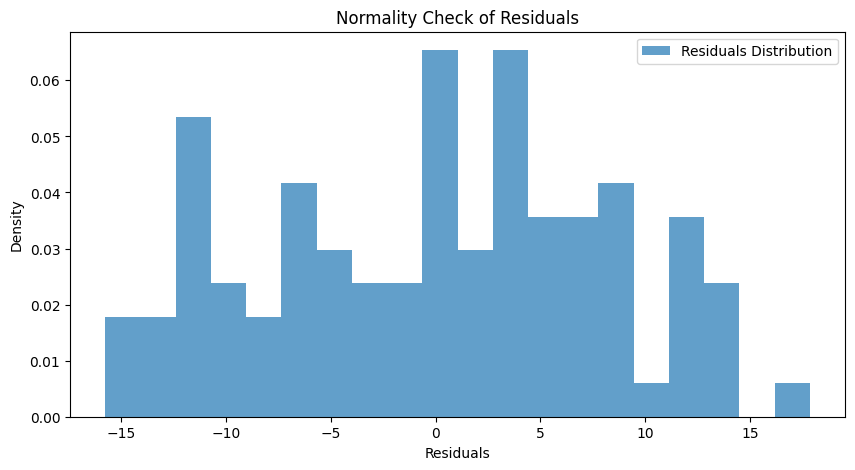

❌ Остатки не соответствуют нормальному распределению: p-value (Shapiro)=0.0348, p-value (D'Agostino)=0.0060.
    Feature         VIF
0      Time  914.100589
1  Feature2  914.100589
❌ Высокая мультиколлинеарность между признаками.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import shapiro, normaltest

# 1. Создаем временной ряд
np.random.seed(42)
n = 100
time = np.arange(n)
trend = 0.5 * time
seasonal = 10 * np.sin(2 * np.pi * time / 12)
noise = np.random.normal(0, 5, size=n)
y = trend + seasonal + noise
data = pd.DataFrame({'Time': time, 'Value': y})

# 2. Построим график данных
plt.figure(figsize=(10, 5))
plt.plot(data['Time'], data['Value'], label='Time Series')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Generated Time Series')
plt.legend()
plt.show()

# 3. Автоматизированная проверка условий
def check_linearity(X, y):
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    residuals = y - y_pred

    # Визуализация линейности
    plt.figure(figsize=(10, 5))
    plt.scatter(X, y, label='Observed Data', alpha=0.7)
    plt.plot(X, y_pred, color='red', label='Linear Fit')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.title('Linear Fit Check')
    plt.legend()
    plt.show()

    mse = mean_squared_error(y, y_pred)
    print(f"Mean Squared Error: {mse:.4f}")

    # Простая эвристика: если среднеквадратичная ошибка слишком велика
    if mse > np.var(y) * 0.2:  # 20% от дисперсии данных
        print("❌ Нарушение линейности: модель плохо описывает данные.")
    else:
        print("✅ Линейность данных подтверждена.")
    return model, residuals

def check_independence(data):
    plot_acf(data['Value'], lags=20)
    plt.title('Autocorrelation Function')
    plt.show()

    # Простая эвристика: если есть высокая автокорреляция на первых лагах
    acf_values = pd.Series([data['Value'].autocorr(lag) for lag in range(1, 5)])
    if acf_values.abs().max() > 0.3:  # Граница для автокорреляции
        print("❌ Нарушение независимости: данные имеют автокорреляцию.")
    else:
        print("✅ Независимость данных подтверждена.")

def check_homoscedasticity(model, residuals, X):
    y_pred = model.predict(X)
    plt.figure(figsize=(10, 5))
    plt.scatter(y_pred, residuals, alpha=0.7)
    plt.axhline(0, color='red', linestyle='--', label='Zero Residual Line')
    plt.xlabel('Predicted Value')
    plt.ylabel('Residuals')
    plt.title('Homoscedasticity Check')
    plt.legend()
    plt.show()

    # Простая эвристика: проверяем, есть ли увеличение дисперсии остатков
    if np.var(residuals[:len(residuals)//2]) != np.var(residuals[len(residuals)//2:]):
        print("❌ Нарушение гомоскедастичности: дисперсия остатков неоднородна.")
    else:
        print("✅ Гомоскедастичность подтверждена.")

def check_normality(residuals):
    plt.figure(figsize=(10, 5))
    plt.hist(residuals, bins=20, alpha=0.7, density=True, label='Residuals Distribution')
    plt.xlabel('Residuals')
    plt.ylabel('Density')
    plt.title('Normality Check of Residuals')
    plt.legend()
    plt.show()

    shapiro_test = shapiro(residuals)
    normal_test_stat, normal_test_pvalue = normaltest(residuals)

    if shapiro_test.pvalue < 0.05 or normal_test_pvalue < 0.05:
        print(f"❌ Остатки не соответствуют нормальному распределению: p-value (Shapiro)={shapiro_test.pvalue:.4f}, p-value (D'Agostino)={normal_test_pvalue:.4f}.")
    else:
        print("✅ Остатки распределены нормально.")

def check_multicollinearity(data):
    # Добавляем искусственный признак для проверки
    data['Feature2'] = 0.5 * data['Time'] + np.random.normal(0, 1, len(data))
    X_multi = data[['Time', 'Feature2']].values
    vif_data = pd.DataFrame({
        'Feature': ['Time', 'Feature2'],
        'VIF': [variance_inflation_factor(X_multi, i) for i in range(X_multi.shape[1])]
    })
    print(vif_data)

    if vif_data['VIF'].max() > 5:  # Порог VIF > 5
        print("❌ Высокая мультиколлинеарность между признаками.")
    else:
        print("✅ Мультиколлинеарность отсутствует.")

# Выполнение проверок
X = data['Time'].values.reshape(-1, 1)
y = data['Value'].values

model, residuals = check_linearity(X, y)
check_independence(data)
check_homoscedasticity(model, residuals, X)
check_normality(residuals)
check_multicollinearity(data)

Наши резултаты указывают на то, что данные не удовлетворяют условиям применения линейной регрессии. Для решения выявленных проблем предлагаются следующие корректирующие меры:

---

### 1. **Нарушение линейности**
   - **Проблема**: Линейная модель плохо описывает зависимости между переменными, что может быть обусловлено наличием сезонных компонентов во временном ряде.
   - **Решение**:
     - Устранение сезонных эффектов посредством декомпозиции временного ряда или сглаживания.
     - Применение моделей, учитывающих нелинейные зависимости, например, полиномиальной регрессии или регрессионных моделей с использованием тригонометрических функций для учета сезонности.

---

### 2. **Нарушение независимости**
   - **Проблема**: Наличие автокорреляции между наблюдениями указывает на зависимость значений целевой переменной от предыдущих значений.
   - **Решение**:
     - Применение временных моделей, таких как авторегрессионные модели (ARIMA, SARIMA), для учета временной структуры данных.
     - Дифференцирование временного ряда для устранения автокорреляции.

---

### 3. **Нарушение гомоскедастичности**
   - **Проблема**: Дисперсия остатков изменяется в зависимости от значения предсказанной переменной, что указывает на гетероскедастичность.
   - **Решение**:
     - Выполнение трансформации данных, например, логарифмической (\(\log\)), квадратного корня (\(\sqrt{}\)) или с использованием метода Бокса-Кокса.
     - Использование робастной регрессии, которая снижает влияние неоднородности дисперсии.

---

### 4. **Нарушение нормальности остатков**
   - **Проблема**: Остаточные значения не соответствуют нормальному распределению, что нарушает допущения линейной регрессии и снижает надежность интерпретации.
   - **Решение**:
     - Выполнение преобразований, таких как логарифмическое или стандартное шкалирование, для обеспечения нормальности остатков.
     - Применение моделей, менее чувствительных к отклонению от нормальности (например, деревья решений или градиентный бустинг).

---

### 5. **Высокая мультиколлинеарность**
   - **Проблема**: Между признаками наблюдается сильная корреляция, что усложняет интерпретацию коэффициентов регрессии.
   - **Решение**:
     - Исключение одного из коррелирующих признаков из набора данных.
     - Применение методов регуляризации (например, Lasso или Ridge-регрессии) для снижения влияния мультиколлинеарности.

---

### Корректирующий подход: модифицированный код
Для устранения вышеуказанных проблем выполнены следующие преобразования:
1. Удалена сезонная составляющая из временного ряда.
2. Применено логарифмическое преобразование для стабилизации дисперсии.
3. Исключен искусственно созданный признак `Feature2` для устранения мультиколлинеарности.




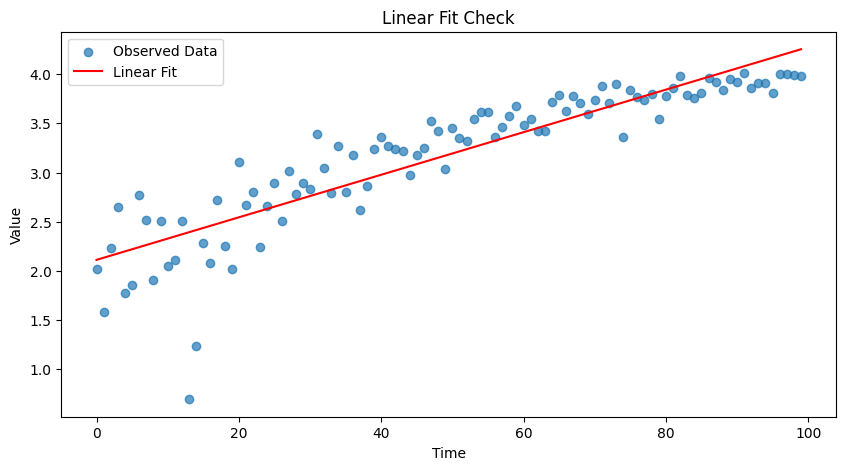

Mean Squared Error: 0.1026
❌ Нарушение линейности: модель плохо описывает данные.


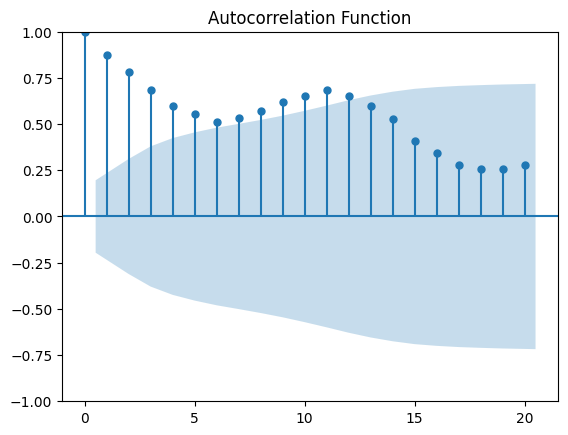

❌ Нарушение независимости: данные имеют автокорреляцию.


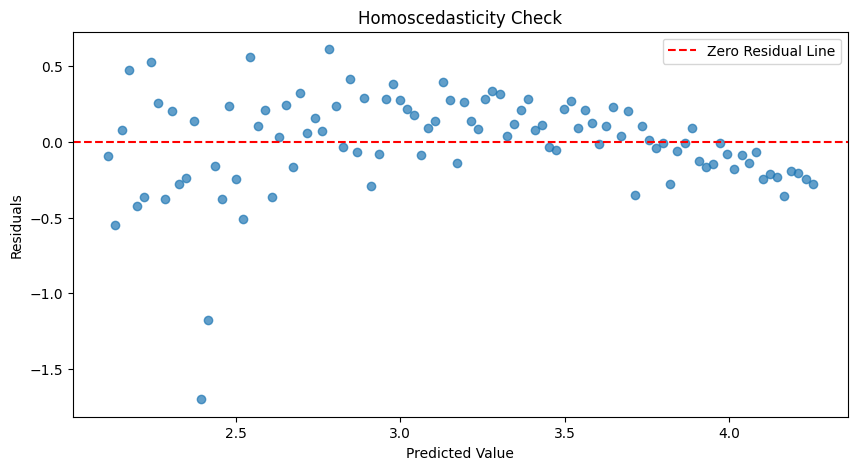

❌ Нарушение гомоскедастичности: дисперсия остатков неоднородна.


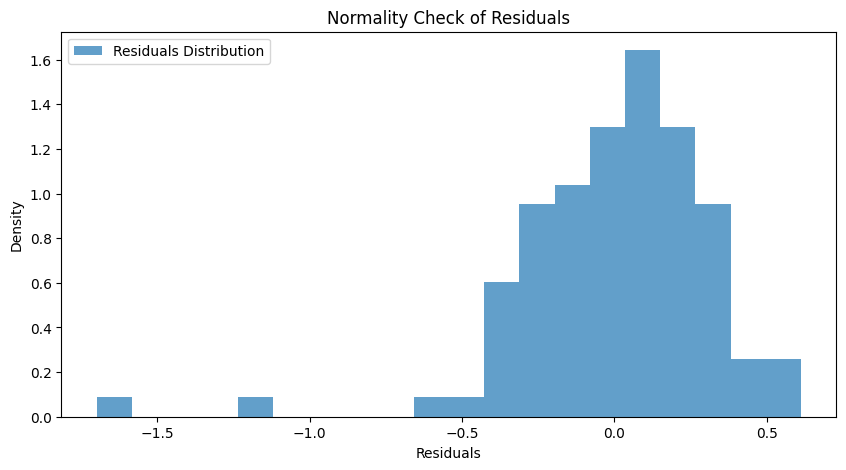

❌ Остатки не соответствуют нормальному распределению: p-value (Shapiro)=0.0000, p-value (D'Agostino)=0.0000.
    Feature         VIF
0      Time  704.125736
1  Feature2  704.125736
❌ Высокая мультиколлинеарность между признаками.


In [ ]:
# Удаление сезонной компоненты
data['Deseasonalized'] = data['Value'] - 10 * np.sin(2 * np.pi * data['Time'] / 12)

# Логарифмическое преобразование
data['LogTransformed'] = np.log1p(data['Deseasonalized'] - data['Deseasonalized'].min() + 1)

# Обновленные данные
X = data['Time'].values.reshape(-1, 1)
y = data['LogTransformed'].values

# Повторная проверка условий линейной регрессии
model, residuals = check_linearity(X, y)
check_independence(data)
check_homoscedasticity(model, residuals, X)
check_normality(residuals)
check_multicollinearity(data.drop(columns=['Feature2']))




### Ожидаемые результаты:
1. **Линейность**: Устранение сезонной составляющей улучшает соответствие модели линейной регрессии.
2. **Гомоскедастичность**: Логарифмическое преобразование стабилизирует дисперсию остатков.
3. **Нормальность остатков**: Преобразованные остатки приближаются к нормальному распределению.
4. **Мультиколлинеарность**: Исключение коррелирующего признака снижает VIF.

Если после корректировок остаются значительные нарушения, это может свидетельствовать о необходимости применения более сложных моделей или методов анализа данных, таких как нелинейные модели или алгоритмы машинного обучения.

### Масштабирование признаков  
Масштабирование признаков позволяет привести данные к единому масштабу, что улучшает сходимость алгоритмов оптимизации и повышает точность модели. Данные преобразуются так, чтобы каждый признак был представлен относительно своего центра распределения и масштаба.  

Обозначения:  
- $n$ — число наблюдений (объектов);  
- $m$ — число признаков;  
- $x_j$ — список всех значений для $j$-го признака из набора данных;  
- $\text{mean}$ — среднее значение признака:  
$$
  \text{mean}_j = \frac{1}{n} \sum_{i=1}^{n} x_{ij};
$$
- $\text{std}$ — стандартное отклонение признака:  
$$
  \text{std}_j = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (x_{ij} - \text{mean}_j)^2}.
$$

Преобразование выполняется по формуле:  
$$
x_{ij}' = \frac{x_{ij} - \text{mean}_j}{\text{std}_j},
$$  
где $x_{ij}$ — исходное значение признака, $x_{ij}'$ — нормализованное значение.  

---

### Обучение модели линейной регрессии  

Основная цель при обучении модели линейной регрессии (ЛинР) — найти такую линию (в случае многомерного пространства — гиперплоскость), которая минимизирует ошибку между предсказанными значениями модели и целевыми значениями.  

Модель линейной регрессии аппроксимирует зависимую переменную $Y$ на основе независимых переменных $X$. Гиперплоскость отражает общую тенденцию изменения зависимой переменной $Y$ при изменении независимых переменных $X_1, X_2, \ldots, X_m$.  

Функция линейной регрессии описывается как:  
$$
\hat{y}_i = b + \sum_{j=1}^{m} w_j x_{ij},
$$  
где:  
- $\hat{y}_i$ — предсказанное значение для $i$-го объекта;  
- $b$ — смещение (intercept);  
- $w_j$ — веса модели (коэффициенты);  
- $x_{ij}$ — $j$-й признак $i$-го объекта.  

---

### Оптимизация с помощью MSE и градиентного спуска  

Для нахождения оптимальных параметров $w$ и $b$ используется функция ошибки — среднеквадратичная ошибка (MSE):  
$$
E = \frac{1}{n} \sum_{i=1}^{n} (\hat{y}_i - y_i)^2,
$$  
где $y_i$ — истинное значение для $i$-го объекта.  

Для минимизации MSE применяется градиентный спуск. Алгоритм обновления параметров основан на вычислении градиента функции ошибки:  

1. Производная функции ошибки по весам:  
$$
\frac{\partial E}{\partial w_j} = \frac{2}{n} \sum_{i=1}^{n} (\hat{y}_i - y_i) x_{ij}.
$$  

2. Производная функции ошибки по смещению:  
$$
\frac{\partial E}{\partial b} = \frac{2}{n} \sum_{i=1}^{n} (\hat{y}_i - y_i).
$$  

3. Обновление параметров:  
$$
w_j := w_j - \text{lr} \cdot \frac{\partial E}{\partial w_j}, \quad b := b - \text{lr} \cdot \frac{\partial E}{\partial b},
$$  
где $\text{lr}$ — скорость обучения.  

**Важно:**  
Для корректной работы градиентного спуска в MSE из предсказанного значения $\hat{y}_i$ вычитается целевое значение $y_i$. Если их перепутать (вычитать $y_i$ из $\hat{y}_i$), нужно изменить знак вычитания на знак прибавления в формуле обновления параметров.  



In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split


class LinearRegression:
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.iterations):
            y_predicted = np.dot(X, self.weights) + self.bias

            dw = (2 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (2 / n_samples) * np.sum(y_predicted - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias


def scale_features(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    return (X - mean) / std, mean, std


def inverse_scale_features(X_scaled, mean, std):
    return X_scaled * std + mean


def create_lagged_features(data, lag):
    """
    Создает лаговые признаки для временного ряда.

    :param data: ndarray, размер (n,) — исходный временной ряд
    :param lag: int — количество лагов
    :return: tuple (X, y) — матрица лаговых признаков и целевая переменная
    """
    X, y = [], []
    for i in range(lag, len(data)):
        X.append(data[i - lag:i])
        y.append(data[i])
    return np.array(X), np.array(y)


# Пример использования
if __name__ == "__main__":
    # Пример временного ряда
    time_series = np.array([100, 102, 104, 103, 107, 110, 115, 117, 120, 125])

    # Создание лаговых признаков (например, лаг = 3)
    lag = 3
    X, y = create_lagged_features(time_series, lag)

    # Разделение на тренировочную и тестовую выборки
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

    # Масштабирование признаков
    X_train_scaled, mean_X, std_X = scale_features(X_train)
    y_train_scaled, mean_y, std_y = scale_features(y_train)

    # Обучение модели
    model = LinearRegression(learning_rate=0.01, iterations=1000)
    model.fit(X_train_scaled, y_train_scaled)

    # Предсказания на тестовых данных
    X_test_scaled = (X_test - mean_X) / std_X
    y_pred_scaled = model.predict(X_test_scaled)

    # Обратное преобразование для предсказанных значений
    y_pred = inverse_scale_features(y_pred_scaled, mean_y, std_y)

    print("Истинные значения:", y_test)
    print("Предсказанные значения:", y_pred)

Истинные значения: [120 125]
Предсказанные значения: [124.78810515 130.08911966]


### Регуляризация  

**Регуляризация** — это метод, который ограничивает значения коэффициентов модели, чтобы улучшить её обобщающую способность и снизить риск переобучения. Это достигается путём добавления специальных штрафных членов в целевую функцию, называемых членами регуляризации.  

Каждый член регуляризации включает гиперпараметр, который определяет степень влияния штрафа на итоговую модель. Этот гиперпараметр позволяет балансировать между минимизацией функции ошибки и ограничением сложности модели.  

Во всех методах, рассмотренных ниже, смещение $b$ (intercept) учитывается как последний вес модели, поэтому общее количество параметров увеличивается на единицу ($m = m + 1$).  

---

#### **L1-регуляризация (L1-норма вектора весов)**  

**L1-регуляризация** ограничивает сложность модели за счёт минимизации суммы абсолютных значений весов:  
$$
\lambda \sum_{i=1}^m |w_i|,
$$  
где:  
- $\lambda$ — гиперпараметр регуляризации, определяющий величину штрафа,  
- $w_i$ — коэффициенты модели.  

Этот метод способствует созданию разреженных моделей, так как для некоторых весов оптимальным становится их обнуление. Это делает модель проще, удобнее для интерпретации и помогает выделить наиболее важные признаки.  

---

#### **L2-регуляризация (L2-норма вектора весов)**  

**L2-регуляризация** уменьшает риск переобучения, добавляя в функцию ошибки штраф за сумму квадратов значений весов:  
$$
\lambda \sum_{i=1}^m w_i^2.
$$  

Основные особенности:  
- L2-регуляризация сглаживает значения весов, уменьшая их абсолютные величины.  
- Метод эффективен при наличии мультиколлинеарности (сильной корреляции между входными признаками).  

Важно отметить, что в отличие от L1-регуляризации, веса при использовании L2 не обнуляются, что может быть полезным для задач, где важно учитывать все признаки.  

---

#### **Elastic Net (L1- и L2-регуляризация)**  

**Elastic Net** — это комбинированный метод, объединяющий преимущества L1- и L2-регуляризаций.  

Штрафной член функции выглядит так:  
$$
\lambda \left( \alpha \sum_{i=1}^m |w_i| + \frac{1-\alpha}{2} \sum_{i=1}^m w_i^2 \right),
$$  
где:  
- $\lambda$ — общий гиперпараметр регуляризации,  
- $\alpha \in [0, 1]$ — параметр, определяющий доли L1- и L2-регуляризации.  

Особенности метода:  
- Благодаря L1-регуляризации модель становится разреженной (многие веса обнуляются).  
- L2-регуляризация сглаживает значения оставшихся весов, что делает модель устойчивой к мультиколлинеарности.  
- Гибкость Elastic Net позволяет настроить оптимальный баланс между разреженностью модели и устойчивостью к коррелированным признакам.  

Elastic Net особенно полезен в задачах с большим числом признаков, из которых лишь малая часть существенно влияет на результат, и при наличии высокой корреляции между признаками.  



Регуляризация — это мощный инструмент, который помогает повысить производительность моделей, особенно в задачах с ограниченным количеством данных или большим числом признаков. Выбор метода и гиперпараметров регуляризации зависит от специфики данных и задачи.

In [ ]:
import numpy as np


class LinearRegressionWithRegularization:
    def __init__(self, learning_rate=0.01, iterations=1000, regularization=None, lambda_=0.1, alpha=0.5):
        """
        Линейная регрессия с регуляризацией (L1, L2, Elastic Net).

        :param learning_rate: Скорость обучения.
        :param iterations: Количество итераций.
        :param regularization: Тип регуляризации ('l1', 'l2', 'elasticnet' или None).
        :param lambda_: Гиперпараметр регуляризации.
        :param alpha: Параметр Elastic Net (баланс L1 и L2).
        """
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.regularization = regularization
        self.lambda_ = lambda_
        self.alpha = alpha
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        """
        Обучение модели с использованием выбранной регуляризации.

        :param X: ndarray, размер (n, m) — матрица признаков.
        :param y: ndarray, размер (n,) — вектор целевых значений.
        """
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.iterations):
            y_predicted = np.dot(X, self.weights) + self.bias

            # Градиенты
            dw = (2 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (2 / n_samples) * np.sum(y_predicted - y)

            # Добавление регуляризации
            if self.regularization == "l1":
                dw += self.lambda_ * np.sign(self.weights) / n_samples
            elif self.regularization == "l2":
                dw += (2 * self.lambda_ * self.weights) / n_samples
            elif self.regularization == "elasticnet":
                dw += self.lambda_ * (self.alpha * np.sign(self.weights) + (1 - self.alpha) * 2 * self.weights) / n_samples

            # Обновление параметров
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        """
        Предсказание на основе обученной модели.

        :param X: ndarray, размер (n, m) — матрица признаков.
        :return: ndarray, размер (n,) — предсказанные значения.
        """
        return np.dot(X, self.weights) + self.bias


# Пример использования
if __name__ == "__main__":
    # Пример данных
    X = np.array([[1, 2], [2, 3], [3, 4], [4, 5]])
    y = np.array([5, 7, 9, 11])

    # Обучение модели с L1-регуляризацией
    model_l1 = LinearRegressionWithRegularization(learning_rate=0.01, iterations=1000, regularization="l1", lambda_=0.1)
    model_l1.fit(X, y)
    predictions_l1 = model_l1.predict(X)
    print("L1-регуляризация:")
    print("Предсказания:", predictions_l1)

    # Обучение модели с L2-регуляризацией
    model_l2 = LinearRegressionWithRegularization(learning_rate=0.01, iterations=1000, regularization="l2", lambda_=0.1)
    model_l2.fit(X, y)
    predictions_l2 = model_l2.predict(X)
    print("\nL2-регуляризация:")
    print("Предсказания:", predictions_l2)

    # Обучение модели с Elastic Net
    model_en = LinearRegressionWithRegularization(learning_rate=0.01, iterations=1000, regularization="elasticnet",
                                                  lambda_=0.1, alpha=0.5)
    model_en.fit(X, y)
    predictions_en = model_en.predict(X)
    print("\nElastic Net:")
    print("Предсказания:", predictions_en)

L1-регуляризация:
Предсказания: [ 4.98838733  6.99248277  8.99657821 11.00067365]

L2-регуляризация:
Предсказания: [ 4.96645029  6.97978109  8.99311189 11.00644269]

Elastic Net:
Предсказания: [ 4.97533328  6.98513182  8.99493037 11.00472891]


In [ ]:
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import mean_squared_error

# Расширение для поиска гиперпараметров
def grid_search_linear_regression(X, y, param_grid):
    """
    Сеточный поиск для подбора гиперпараметров линейной регрессии с регуляризацией.

    :param X: ndarray, размер (n, m) — матрица признаков.
    :param y: ndarray, размер (n,) — вектор целевых значений.
    :param param_grid: Словарь с диапазонами значений гиперпараметров.
    :return: Лучшая модель, ошибки, параметры.
    """
    best_model = None
    best_params = None
    best_score = float("inf")

    for params in ParameterGrid(param_grid):
        model = LinearRegressionWithRegularization(**params)
        model.fit(X, y)
        predictions = model.predict(X)
        score = mean_squared_error(y, predictions)

        if score < best_score:
            best_model = model
            best_score = score
            best_params = params

    return best_model, best_params, best_score

### Обучение модели с использованием дополнительных членов в функции ошибки  

При использовании регуляризации дополнительные члены становятся частью выражения функции ошибки, добавляясь к ней. Это изменение влияет на процесс оптимизации, так как необходимо учитывать дополнительные слагаемые при вычислении градиента.  

Таким образом, в ходе обучения модели требуется вычислять производные не только от самой функции ошибки, но и от регуляризационных членов $L_1$, $L_2$ или $L_3$.  



### Производные от дополнительных членов  

Производные регуляризационных членов по $j$-ому весу $w_j$:  
- Для $L_1$:  
$$
  \frac{\partial L_1}{\partial w_j} = \lambda \cdot \text{sign}(w_j),
$$
  где $\text{sign}(w_j)$ — функция знака, возвращающая -1, 0 или 1 в зависимости от значения $w_j$.  

- Для $L_2$:  
$$
  \frac{\partial L_2}{\partial w_j} = 2 \cdot \lambda \cdot w_j.
$$

- Для $L_3$ (Elastic Net):  
$$
  \frac{\partial L_3}{\partial w_j} = \alpha \cdot \lambda \cdot \text{sign}(w_j) + (1 - \alpha) \cdot 2 \cdot \lambda \cdot w_j.
$$

Если вычисляется производная по смещению $b$, вместо $w_j$ подставляется $b$.  



### Функция знака  

Функция знака $\text{sign}(x)$:  
$$
\text{sign}(x) =
\begin{cases}
1, & \text{если } x > 0, \\
0, & \text{если } x = 0, \\
-1, & \text{если } x < 0.
\end{cases}
$$  



### Производные по весам и смещению  

Общее выражение для производной функции ошибки с учётом регуляризации:  
$$
\frac{\partial \mathcal{L}}{\partial w_j} = \frac{\partial \mathcal{L}_\text{ошибка}}{\partial w_j} + \frac{\partial L}{\partial w_j},
$$  
где $L$ — соответствующий регуляризационный член ($L_1, L_2, L_3$).  

Для смещения:  
$$
\frac{\partial \mathcal{L}}{\partial b} = \frac{\partial \mathcal{L}_\text{ошибка}}{\partial b} + \frac{\partial L}{\partial b}.
$$  



### Изменение весов и смещения  

Обновление весов и смещения происходит по стандартным правилам градиентного спуска с учётом вычисленных производных.  

Для весов:  
$$
w_j \gets w_j - \eta \cdot \frac{\partial \mathcal{L}}{\partial w_j},
$$  
где $\eta$ — скорость обучения.  

Для смещения:  
$$
b \gets b - \eta \cdot \frac{\partial \mathcal{L}}{\partial b}.
$$  

При этом:  
- Для $L_1$ добавляется слагаемое $\lambda \cdot \text{sign}(w_j)$.  
- Для $L_2$ добавляется $2 \cdot \lambda \cdot w_j$.  
- Для $L_3$ добавляется комбинация $\alpha \cdot \lambda \cdot \text{sign}(w_j) + (1 - \alpha) \cdot 2 \cdot \lambda \cdot w_j$.  



Таким образом, процесс обучения модели с регуляризацией требует дополнительного расчёта производных от регуляризационных членов и их добавления к стандартным градиентам.

### Оценка качества модели  

Для линейной регрессии (ЛинР) используются различные метрики оценки качества. Наиболее популярные из них:  
- **Среднеквадратичная ошибка (MSE)**,  
- **Средняя абсолютная ошибка (MAE)**,  
- **Корень из среднеквадратичной ошибки (RMSE)**,  
- **Коэффициент детерминации $R^2$**,  
- **Скорректированный коэффициент детерминации $R^2_\text{adj}$**.  



#### **Коэффициент детерминации ($R^2$)**  

Коэффициент детерминации $R^2$ показывает, какую долю вариации зависимой переменной объясняет модель. Значение $R^2$ лежит в диапазоне от 0 до 1:  
- $R^2 = 1$ означает, что модель идеально объясняет все наблюдаемые данные.  
- $R^2 = 0$ говорит о том, что модель не объясняет вариацию зависимой переменной лучше, чем простое среднее значение.  

Формула для расчёта $R^2$:  
$$
R^2 = 1 - \frac{\text{ESS}}{\text{TSS}},
$$  
где:  
- $\text{ESS}$ (Error Sum of Squares, остаточная сумма квадратов) измеряет расхождение между наблюдаемыми значениями $t_i$ и прогнозируемыми $y_i$:  
  $$
  \text{ESS} = \sum_{i=1}^{n} (t_i - y_i)^2,
  $$  
- $\text{TSS}$ (Total Sum of Squares, общая сумма квадратов) измеряет отклонение наблюдаемых значений от среднего значения целевой переменной:  
  $$
  \text{TSS} = \sum_{i=1}^{n} (t_i - \text{mean}(T))^2, \quad \text{mean}(T) = \frac{1}{n} \sum_{i=1}^{n} t_i.
  $$  

Чем меньше $\text{ESS}$ по сравнению с $\text{TSS}$, тем выше $R^2$, что указывает на более качественную модель.  



#### **Скорректированный коэффициент детерминации ($R^2_\text{adj}$)**  

$R^2_\text{adj}$ учитывает количество предикторов в модели, чтобы избежать избыточного увеличения $R^2$ при добавлении новых переменных. Формула:  
$$
R^2_\text{adj} = 1 - \frac{(1 - R^2)(n - 1)}{n - p - 1},
$$  
где:  
- $n$ — число наблюдений,  
- $p$ — число независимых переменных.  

Этот показатель позволяет более точно оценить качество модели в случае большого количества признаков.  

### Пример использования линейной регрессии  

**Прогнозирование цены акций**:  
- Независимые переменные: доход компании, объём продаж, показатели рентабельности.  
- Зависимая переменная: текущая цена акций.  
Коэффициенты модели помогут определить, какой фактор оказывает наибольшее влияние на цену.  

**Прогнозирование курса валют**:  
- Независимые переменные: процентные ставки, темпы инфляции, данные о внешней торговле.  
- Зависимая переменная: курс валюты.  
Модель помогает выявить, как изменение ключевых экономических показателей влияет на курс.  



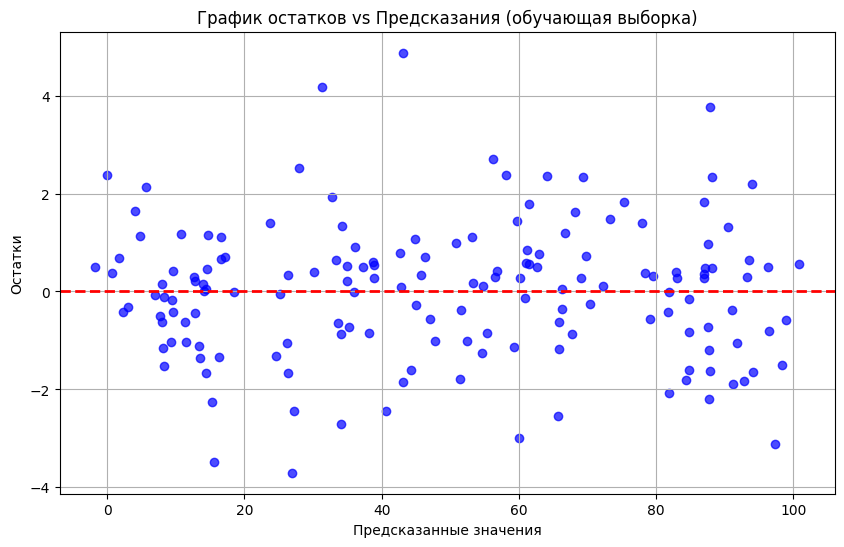

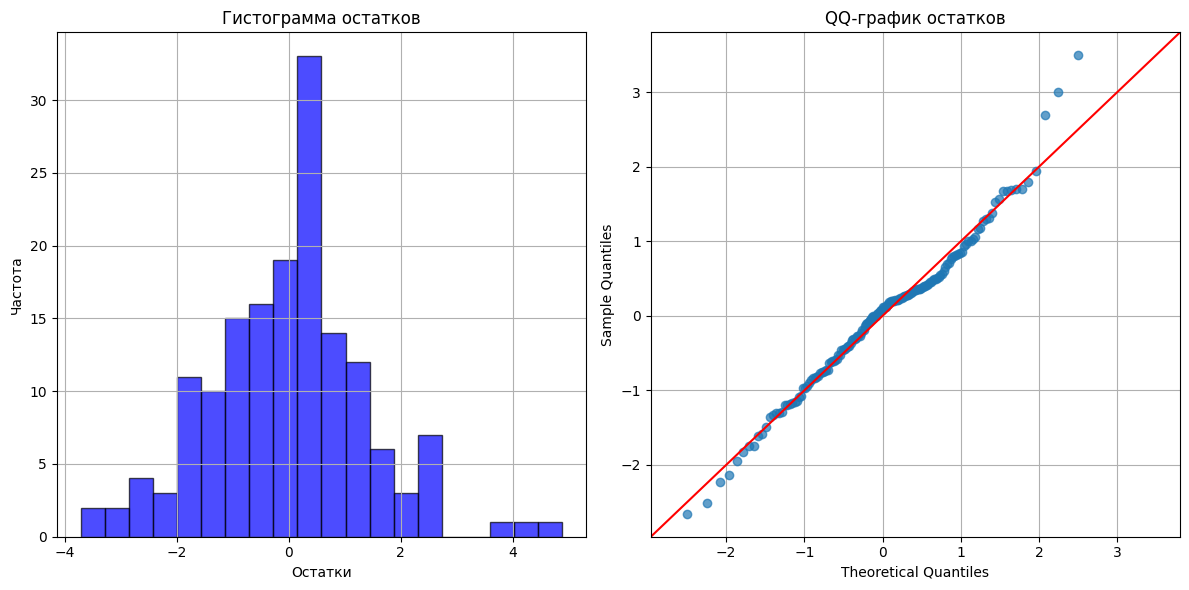

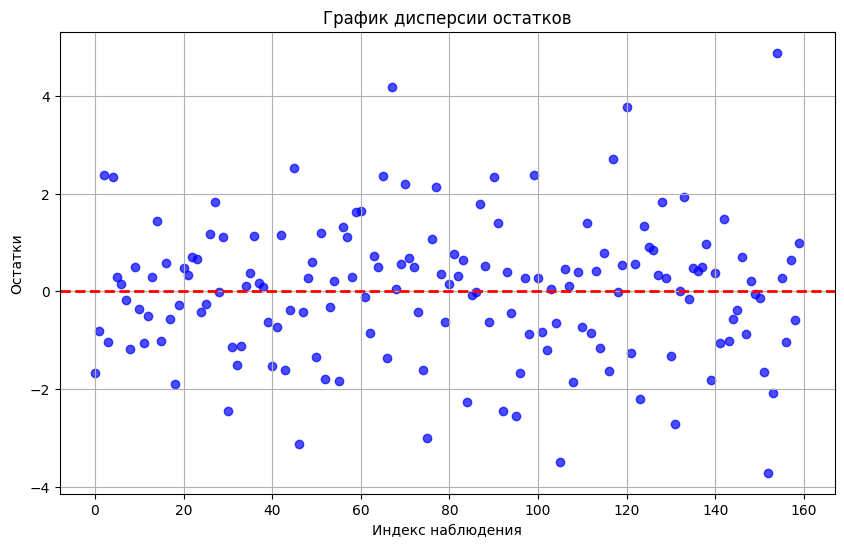

=== Проверка нормальности остатков ===
Тест Шапиро-Уилка: остатки распределены нормально (p-value = 0.08 )
Тест Д’Агостино: остатки распределены нормально (p-value = 0.069 )
=== Мультиколлинеарность (VIF) ===
     Признак       VIF
0  feature_1  1.035001
1  feature_2  1.043926
2  feature_3  1.016971
=== Кросс-валидация ===
R2-оценки при кросс-валидации: [0.99685091 0.99717777 0.99768545 0.99888929 0.99686349]
Среднее значение R2: 0.9974933809111842


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import shapiro, normaltest
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_goldfeldquandt

# Генерация временного ряда
np.random.seed(42)
n_points = 200
time = np.arange(n_points)
trend = 0.5 * time
seasonality = 10 * np.sin(2 * np.pi * time / 50)
noise = np.random.normal(0, 5, n_points)
y = trend + seasonality + noise

feature_1 = trend + np.random.normal(0, 1, n_points)
feature_2 = seasonality + np.random.normal(0, 1, n_points)
feature_3 = noise * 2 + np.random.normal(0, 1, n_points)
data = pd.DataFrame({
    'time': time,
    'feature_1': feature_1,
    'feature_2': feature_2,
    'feature_3': feature_3,
    'target': y
})

X = data[['feature_1', 'feature_2', 'feature_3']]
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_train_pred = lr_model.predict(X_train_scaled)
y_test_pred = lr_model.predict(X_test_scaled)

# Остатки
residuals_train = y_train - y_train_pred

# 1. Визуализация остатков (проверка линейности)
plt.figure(figsize=(10, 6))
plt.scatter(y_train_pred, residuals_train, alpha=0.7, color='blue')
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.title("График остатков vs Предсказания (обучающая выборка)")
plt.xlabel("Предсказанные значения")
plt.ylabel("Остатки")
plt.grid(True)
plt.show()

# 2. Проверка нормальности остатков (гистограмма и QQ-график)
plt.figure(figsize=(12, 6))

# Гистограмма остатков
plt.subplot(1, 2, 1)
plt.hist(residuals_train, bins=20, color='blue', alpha=0.7, edgecolor='black')
plt.title("Гистограмма остатков")
plt.xlabel("Остатки")
plt.ylabel("Частота")
plt.grid(True)

# QQ-график
plt.subplot(1, 2, 2)
sm.qqplot(residuals_train, line='45', fit=True, alpha=0.7, ax=plt.gca())
plt.title("QQ-график остатков")
plt.grid(True)

plt.tight_layout()
plt.show()

# 3. Проверка гомоскедастичности (дисперсия остатков)
plt.figure(figsize=(10, 6))
plt.scatter(range(len(residuals_train)), residuals_train, alpha=0.7, color='blue')
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.title("График дисперсии остатков")
plt.xlabel("Индекс наблюдения")
plt.ylabel("Остатки")
plt.grid(True)
plt.show()

# 4. Нормальность остатков: Shapiro-Wilk и D'Agostino
shapiro_test = shapiro(residuals_train)
dagostino_test = normaltest(residuals_train)

print("=== Проверка нормальности остатков ===")
if shapiro_test.pvalue > 0.05:
    print("Тест Шапиро-Уилка: остатки распределены нормально (p-value =", round(shapiro_test.pvalue, 3), ")")
else:
    print("Тест Шапиро-Уилка: остатки НЕ распределены нормально (p-value =", round(shapiro_test.pvalue, 3), ")")

if dagostino_test.pvalue > 0.05:
    print("Тест Д’Агостино: остатки распределены нормально (p-value =", round(dagostino_test.pvalue, 3), ")")
else:
    print("Тест Д’Агостино: остатки НЕ распределены нормально (p-value =", round(dagostino_test.pvalue, 3), ")")

# 5. Проверка мультиколлинеарности
vif_data = pd.DataFrame()
vif_data["Признак"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_scaled, i) for i in range(X_train_scaled.shape[1])]

print("=== Мультиколлинеарность (VIF) ===")
print(vif_data)

# 6. Кросс-валидация
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(lr_model, X_train_scaled, y_train, cv=kf, scoring='r2')

print("=== Кросс-валидация ===")
print("R2-оценки при кросс-валидации:", cv_scores)
print("Среднее значение R2:", np.mean(cv_scores))

Чтобы спрогнозировать на будущих значениях, необходимо:

1. Создать временные точки для прогноза, которые идут за последними наблюдениями.
2. Генерировать значения дополнительных признаков для новых временных точек.
3. Масштабировать новые данные с использованием уже обученного `StandardScaler`.
4. Прогнозировать целевую переменную с использованием обученной модели.

Добавим шаги в ваш код для прогноза:


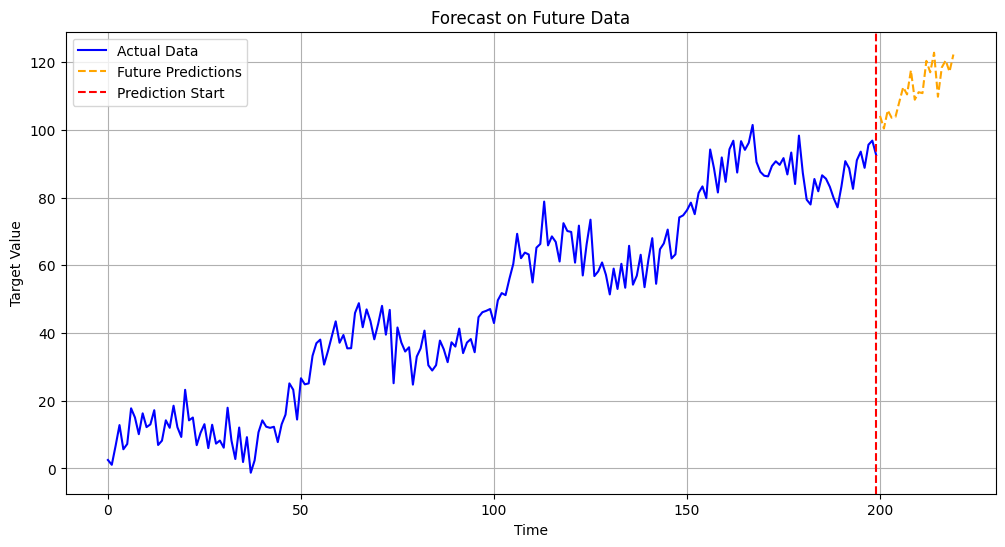

In [ ]:
# Генерация новых временных точек
future_points = 20  # Количество будущих точек для прогноза
future_time = np.arange(n_points, n_points + future_points)

# Генерация новых признаков
future_trend = 0.5 * future_time
future_seasonality = 10 * np.sin(2 * np.pi * future_time / 50)
future_noise = np.random.normal(0, 5, future_points)  # Для синтетических данных

future_feature_1 = future_trend + np.random.normal(0, 1, future_points)
future_feature_2 = future_seasonality + np.random.normal(0, 1, future_points)
future_feature_3 = future_noise * 2 + np.random.normal(0, 1, future_points)

# Создание DataFrame для будущих данных
future_data = pd.DataFrame({
    'feature_1': future_feature_1,
    'feature_2': future_feature_2,
    'feature_3': future_feature_3
})

# Масштабирование будущих данных
future_data_scaled = scaler.transform(future_data)

# Прогнозирование
future_predictions = lr_model.predict(future_data_scaled)

# Визуализация прогноза
plt.figure(figsize=(12, 6))
plt.plot(time, y, label='Actual Data', color='blue')
plt.plot(future_time, future_predictions, label='Future Predictions', color='orange', linestyle='--')
plt.axvline(x=n_points - 1, color='red', linestyle='--', label='Prediction Start')
plt.xlabel('Time')
plt.ylabel('Target Value')
plt.title('Forecast on Future Data')
plt.legend()
plt.grid(True)
plt.show()

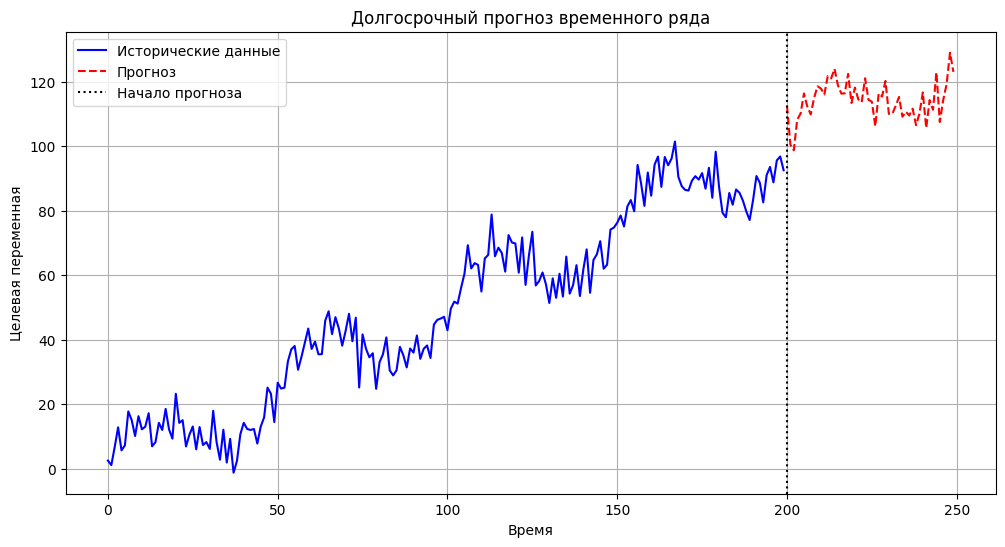

In [ ]:
# Долгосрочный прогноз
future_periods = 50  # Количество будущих периодов
future_time = np.arange(n_points, n_points + future_periods)

# Автоматическая генерация будущих значений
last_trend = trend[-1]
last_seasonality_phase = (time[-1] % 50)  # Позиция в периоде сезонности
future_trend = last_trend + 0.5 * np.arange(1, future_periods + 1)  # Продолжение тренда
future_seasonality = 10 * np.sin(2 * np.pi * (future_time % 50) / 50)  # Сезонность
future_noise = np.random.normal(0, 5, future_periods)  # Шум

# Признаки для будущих периодов
future_feature_1 = future_trend + np.random.normal(0, 1, future_periods)
future_feature_2 = future_seasonality + np.random.normal(0, 1, future_periods)
future_feature_3 = future_noise * 2 + np.random.normal(0, 1, future_periods)

future_data = pd.DataFrame({
    'feature_1': future_feature_1,
    'feature_2': future_feature_2,
    'feature_3': future_feature_3
})

# Масштабирование будущих данных
future_data_scaled = scaler.transform(future_data)

# Прогноз
future_predictions = lr_model.predict(future_data_scaled)

# Визуализация
plt.figure(figsize=(12, 6))
plt.plot(time, y, label="Исторические данные", color='blue')
plt.plot(future_time, future_predictions, label="Прогноз", color='red', linestyle='--')
plt.axvline(n_points, color='black', linestyle=':', label="Начало прогноза")
plt.title("Долгосрочный прогноз временного ряда")
plt.xlabel("Время")
plt.ylabel("Целевая переменная")
plt.legend()
plt.grid(True)
plt.show()

## Lasso-регрессия

MSE (train): 1.98
MSE (test): 2.50
R2 (train): 0.998
R2 (test): 0.996


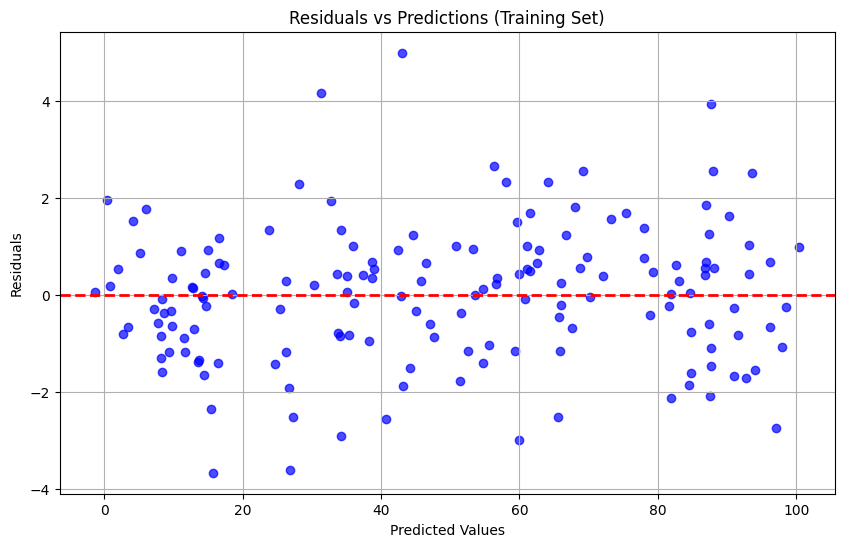

=== Normality of Residuals ===
Shapiro-Wilk test: Residuals are normally distributed (p-value = 0.126 )
D'Agostino's test: Residuals are normally distributed (p-value = 0.056 )
=== Homoscedasticity ===
Goldfeld-Quandt test: Homoscedasticity is confirmed (p-value = 0.508)
=== Multicollinearity (VIF) ===
     Feature       VIF
0  feature_1  1.035001
1  feature_2  1.043926
2  feature_3  1.016971
No significant multicollinearity detected (VIF < 5).
=== Cross-validation ===
Cross-validation R2 scores: [0.99670132 0.99732982 0.99755674 0.99886583 0.99686023]
Mean CV R2 score: 0.9974627888797917


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from scipy.stats import shapiro, normaltest
from statsmodels.stats.diagnostic import het_goldfeldquandt
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Генерация временного ряда
np.random.seed(42)
n_points = 200
time = np.arange(n_points)
trend = 0.5 * time
seasonality = 10 * np.sin(2 * np.pi * time / 50)
noise = np.random.normal(0, 5, n_points)
y = trend + seasonality + noise

# Дополнительные признаки
feature_1 = trend + np.random.normal(0, 1, n_points)
feature_2 = seasonality + np.random.normal(0, 1, n_points)
feature_3 = noise * 2 + np.random.normal(0, 1, n_points)
data = pd.DataFrame({
    'time': time,
    'feature_1': feature_1,
    'feature_2': feature_2,
    'feature_3': feature_3,
    'target': y
})

# Разделение данных
X = data[['feature_1', 'feature_2', 'feature_3']]
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Масштабирование
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Lasso-регрессия
lasso_model = Lasso(alpha=0.1, random_state=42)
lasso_model.fit(X_train_scaled, y_train)
y_train_pred = lasso_model.predict(X_train_scaled)
y_test_pred = lasso_model.predict(X_test_scaled)

# Метрики
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"MSE (train): {mse_train:.2f}")
print(f"MSE (test): {mse_test:.2f}")
print(f"R2 (train): {r2_train:.3f}")
print(f"R2 (test): {r2_test:.3f}")

# Диагностика
residuals_train = y_train - y_train_pred

# 1. Проверка линейности (график остатков)
plt.figure(figsize=(10, 6))
plt.scatter(y_train_pred, residuals_train, alpha=0.7, color='blue')
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.title("Residuals vs Predictions (Training Set)")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()

# 2. Нормальность остатков
shapiro_test = shapiro(residuals_train)
dagostino_test = normaltest(residuals_train)

print("=== Normality of Residuals ===")
if shapiro_test.pvalue > 0.05:
    print("Shapiro-Wilk test: Residuals are normally distributed (p-value =", round(shapiro_test.pvalue, 3), ")")
else:
    print("Shapiro-Wilk test: Residuals are NOT normally distributed (p-value =", round(shapiro_test.pvalue, 3), ")")

if dagostino_test.pvalue > 0.05:
    print("D'Agostino's test: Residuals are normally distributed (p-value =", round(dagostino_test.pvalue, 3), ")")
else:
    print("D'Agostino's test: Residuals are NOT normally distributed (p-value =", round(dagostino_test.pvalue, 3), ")")

# 3. Гомоскедастичность (дисперсия остатков)
X_train_sm = sm.add_constant(X_train_scaled)
gq_test_stat, gq_p_value, _ = het_goldfeldquandt(y_train, X_train_scaled)
print("=== Homoscedasticity ===")
if gq_p_value > 0.05:
    print(f"Goldfeld-Quandt test: Homoscedasticity is confirmed (p-value = {round(gq_p_value, 3)})")
else:
    print(f"Goldfeld-Quandt test: Heteroscedasticity detected (p-value = {round(gq_p_value, 3)})")

# 4. Мультиколлинеарность
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_scaled, i) for i in range(X_train_scaled.shape[1])]
print("=== Multicollinearity (VIF) ===")
print(vif_data)
if vif_data["VIF"].max() > 10:
    print("Warning: High multicollinearity detected (VIF > 10).")
elif vif_data["VIF"].max() > 5:
    print("Note: Moderate multicollinearity detected (VIF > 5).")
else:
    print("No significant multicollinearity detected (VIF < 5).")

# 5. Кросс-валидация
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(lasso_model, X_train_scaled, y_train, cv=kf, scoring='r2')
print("=== Cross-validation ===")
print("Cross-validation R2 scores:", cv_scores)
print("Mean CV R2 score:", np.mean(cv_scores))

## Ridge-регрессия

MSE (train): 1.99
MSE (test): 2.50
R2 (train): 0.998
R2 (test): 0.996


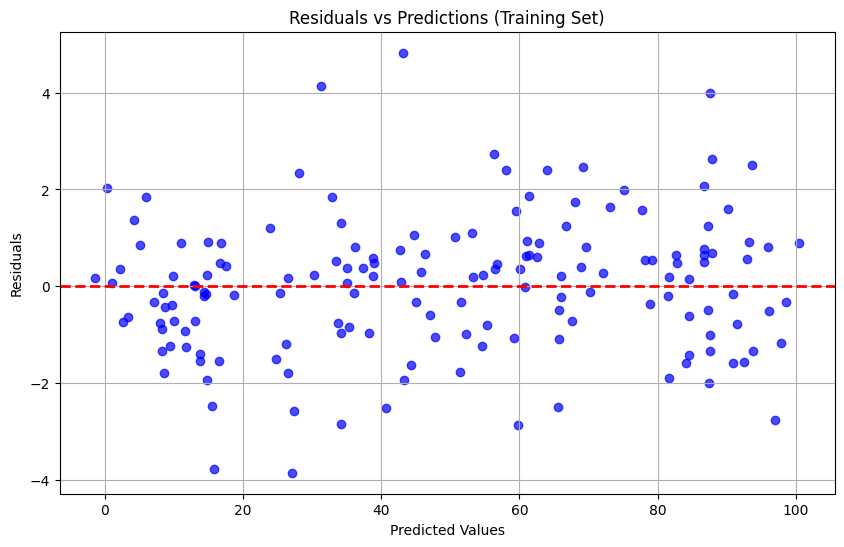

=== Normality of Residuals ===
Shapiro-Wilk test: Residuals are normally distributed (p-value = 0.11 )
D'Agostino's test: Residuals are normally distributed (p-value = 0.066 )
=== Homoscedasticity ===
Goldfeld-Quandt test: Homoscedasticity is confirmed (p-value = 0.508)
=== Multicollinearity (VIF) ===
     Feature       VIF
0  feature_1  1.035001
1  feature_2  1.043926
2  feature_3  1.016971
No significant multicollinearity detected (VIF < 5).
=== Cross-validation ===
Cross-validation R2 scores: [0.99655575 0.99734276 0.99731963 0.99893174 0.99697809]
Mean CV R2 score: 0.997425594034647


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import shapiro, normaltest
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_goldfeldquandt

# Генерация временного ряда
np.random.seed(42)
n_points = 200
time = np.arange(n_points)
trend = 0.5 * time
seasonality = 10 * np.sin(2 * np.pi * time / 50)
noise = np.random.normal(0, 5, n_points)
y = trend + seasonality + noise

# Дополнительные признаки
feature_1 = trend + np.random.normal(0, 1, n_points)
feature_2 = seasonality + np.random.normal(0, 1, n_points)
feature_3 = noise * 2 + np.random.normal(0, 1, n_points)
data = pd.DataFrame({
    'time': time,
    'feature_1': feature_1,
    'feature_2': feature_2,
    'feature_3': feature_3,
    'target': y
})

# Разделение данных
X = data[['feature_1', 'feature_2', 'feature_3']]
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Масштабирование
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Ridge-регрессия
ridge_model = Ridge(alpha=1.0)  # alpha - параметр регуляризации
ridge_model.fit(X_train_scaled, y_train)
y_train_pred = ridge_model.predict(X_train_scaled)
y_test_pred = ridge_model.predict(X_test_scaled)

# Метрики
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"MSE (train): {mse_train:.2f}")
print(f"MSE (test): {mse_test:.2f}")
print(f"R2 (train): {r2_train:.3f}")
print(f"R2 (test): {r2_test:.3f}")

# Диагностика
residuals_train = y_train - y_train_pred

# 1. Проверка линейности (график остатков)
plt.figure(figsize=(10, 6))
plt.scatter(y_train_pred, residuals_train, alpha=0.7, color='blue')
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.title("Residuals vs Predictions (Training Set)")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()

# 2. Нормальность остатков
shapiro_test = shapiro(residuals_train)
dagostino_test = normaltest(residuals_train)

print("=== Normality of Residuals ===")
if shapiro_test.pvalue > 0.05:
    print("Shapiro-Wilk test: Residuals are normally distributed (p-value =", round(shapiro_test.pvalue, 3), ")")
else:
    print("Shapiro-Wilk test: Residuals are NOT normally distributed (p-value =", round(shapiro_test.pvalue, 3), ")")

if dagostino_test.pvalue > 0.05:
    print("D'Agostino's test: Residuals are normally distributed (p-value =", round(dagostino_test.pvalue, 3), ")")
else:
    print("D'Agostino's test: Residuals are NOT normally distributed (p-value =", round(dagostino_test.pvalue, 3), ")")

# 3. Гомоскедастичность (дисперсия остатков)
X_train_sm = sm.add_constant(X_train_scaled)
gq_test_stat, gq_p_value, _ = het_goldfeldquandt(y_train, X_train_scaled)
print("=== Homoscedasticity ===")
if gq_p_value > 0.05:
    print(f"Goldfeld-Quandt test: Homoscedasticity is confirmed (p-value = {round(gq_p_value, 3)})")
else:
    print(f"Goldfeld-Quandt test: Heteroscedasticity detected (p-value = {round(gq_p_value, 3)})")

# 4. Мультиколлинеарность
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_scaled, i) for i in range(X_train_scaled.shape[1])]
print("=== Multicollinearity (VIF) ===")
print(vif_data)
if vif_data["VIF"].max() > 10:
    print("Warning: High multicollinearity detected (VIF > 10).")
elif vif_data["VIF"].max() > 5:
    print("Note: Moderate multicollinearity detected (VIF > 5).")
else:
    print("No significant multicollinearity detected (VIF < 5).")

# 5. Кросс-валидация
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(ridge_model, X_train_scaled, y_train, cv=kf, scoring='r2')
print("=== Cross-validation ===")
print("Cross-validation R2 scores:", cv_scores)
print("Mean CV R2 score:", np.mean(cv_scores))